<a href="https://colab.research.google.com/github/AndresQui20/Clase-inteligencia-artificial/blob/main/Copia_de_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("waqi786/global-air-quality-dataset")

print("Path to dataset files:", path)

100%|██████████| 258k/258k [00:00<00:00, 9.93MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/waqi786/global-air-quality-dataset/versions/1


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/global_air_quality_data_10000.csv")
df.head()

City   Country        Date   PM2.5    PM10    NO2    SO2    CO  \
0         Bangkok  Thailand  2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        Istanbul    Turkey  2023-02-16   50.63   97.39  48.14   8.71  3.40   
2  Rio de Janeiro    Brazil  2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          Mumbai     India  2023-03-16  119.70  130.52  10.96  33.03  7.74   
4           Paris    France  2023-04-04   55.20   36.62  76.85  21.85  2.00   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51        6.36  
2  179.31        25.29     29.30       12.87  
3   38.65        23.15     99.97        7.71  
4   67.09        16.02     90.28       14.16

In [1]:
# prompt: necesito que elimines los datos nulos del dataframe

import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("waqi786/global-air-quality-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/global_air_quality_data_10000.csv")

# Drop rows with any null values
df = df.dropna()

df.head()


100%|██████████| 258k/258k [00:00<00:00, 26.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/waqi786/global-air-quality-dataset/versions/1


City   Country        Date   PM2.5    PM10    NO2    SO2    CO  \
0         Bangkok  Thailand  2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        Istanbul    Turkey  2023-02-16   50.63   97.39  48.14   8.71  3.40   
2  Rio de Janeiro    Brazil  2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          Mumbai     India  2023-03-16  119.70  130.52  10.96  33.03  7.74   
4           Paris    France  2023-04-04   55.20   36.62  76.85  21.85  2.00   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51        6.36  
2  179.31        25.29     29.30       12.87  
3   38.65        23.15     99.97        7.71  
4   67.09        16.02     90.28       14.16

In [2]:
# prompt: ahora necesito que elimines los outliers y formatos de inconsistencias

import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("waqi786/global-air-quality-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/global_air_quality_data_10000.csv")

# Drop rows with any null values
df = df.dropna()

# Identify numerical columns for outlier removal
numerical_cols = df.select_dtypes(include=['number']).columns

# Remove outliers using IQR method
for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Convert columns to appropriate data types
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].str.strip()  # Remove leading/trailing whitespace
    df[col] = df[col].str.lower()  # Convert to lowercase


df.head()


Path to dataset files: /root/.cache/kagglehub/datasets/waqi786/global-air-quality-dataset/versions/1


City   Country        Date   PM2.5    PM10    NO2    SO2    CO  \
0         bangkok  thailand  2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        istanbul    turkey  2023-02-16   50.63   97.39  48.14   8.71  3.40   
2  rio de janeiro    brazil  2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          mumbai     india  2023-03-16  119.70  130.52  10.96  33.03  7.74   
4           paris    france  2023-04-04   55.20   36.62  76.85  21.85  2.00   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51        6.36  
2  179.31        25.29     29.30       12.87  
3   38.65        23.15     99.97        7.71  
4   67.09        16.02     90.28       14.16

Index(['City', 'Country', 'Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'Temperature', 'Humidity', 'Wind Speed'],
      dtype='object')


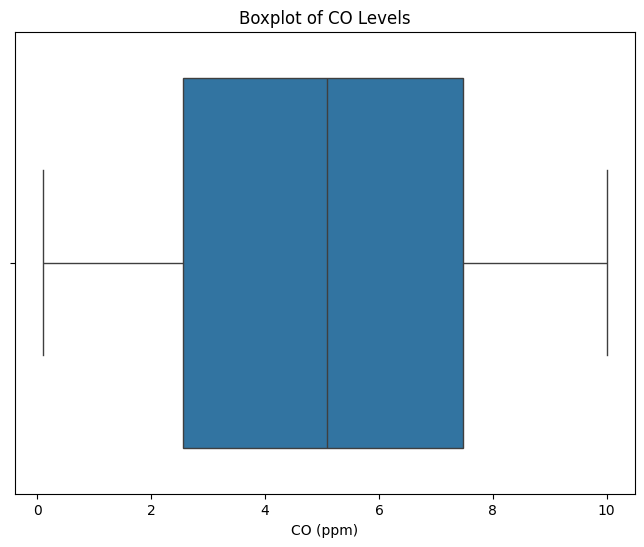

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Print the column names of your DataFrame to see the actual names:
print(df.columns)

# 2. If the column name is different, update your code with the correct name.
#    For example, if the column name is 'CO', change the code as follows:

plt.figure(figsize=(8, 6))
# Assuming the column name is actually 'CO'
sns.boxplot(x=df['CO'])
plt.title('Boxplot of CO Levels')
plt.xlabel('CO (ppm)')
plt.show()

Ruta a los archivos del dataset: /root/.cache/kagglehub/datasets/waqi786/global-air-quality-dataset/versions/1
## 1. Estadísticas Descriptivas
              PM2.5          PM10           NO2           SO2            CO  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      77.448439    104.438161     52.198649     25.344490      5.047984   
std       41.927871     55.062396     27.320490     14.091194      2.852625   
min        5.020000     10.000000      5.010000      1.000000      0.100000   
25%       41.185000     57.137500     28.347500     13.190000      2.560000   
50%       77.725000    103.690000     52.100000     25.350000      5.090000   
75%      113.392500    152.265000     75.705000     37.500000      7.480000   
max      149.980000    200.000000    100.000000     49.990000     10.000000   

                 O3  Temperature      Humidity    Wind Speed  
count  10000.000000  10000.00000  10000.000000  10000.000000  
mean     106.031643

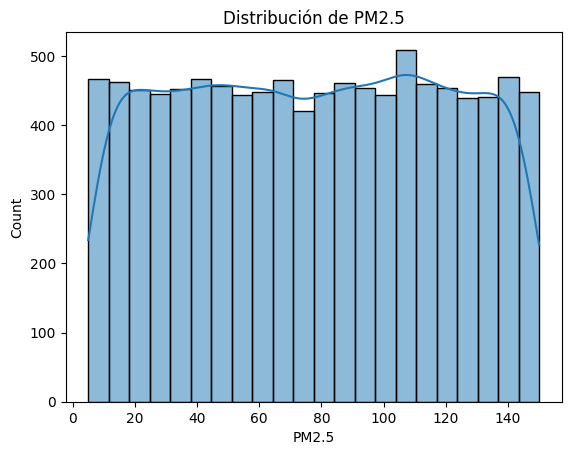

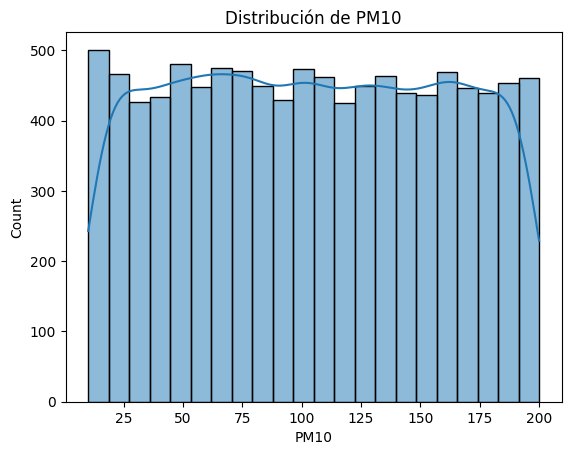

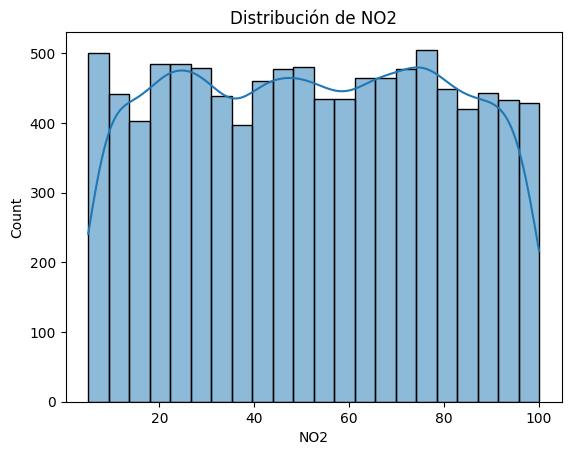

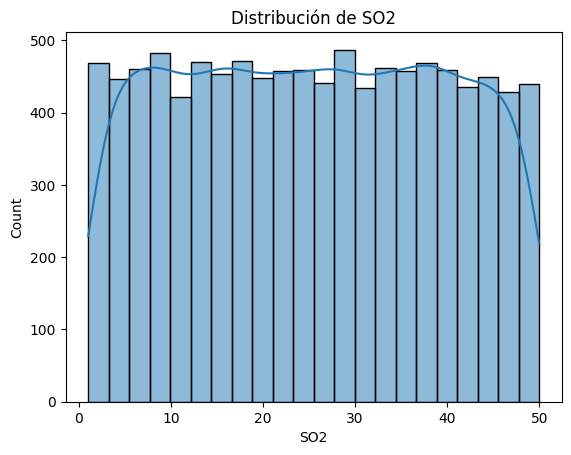

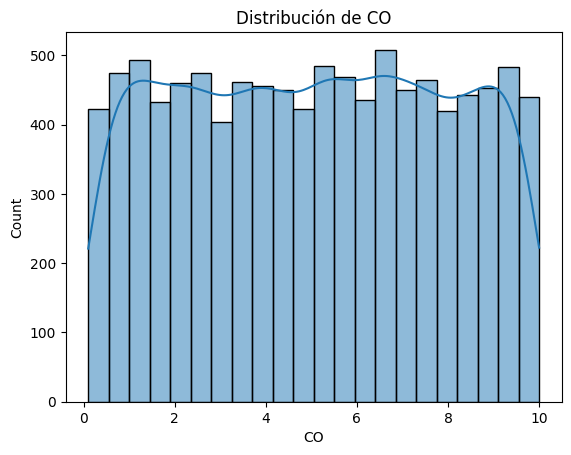

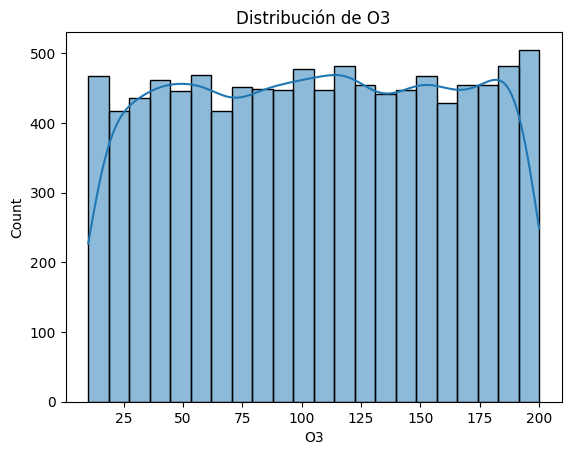

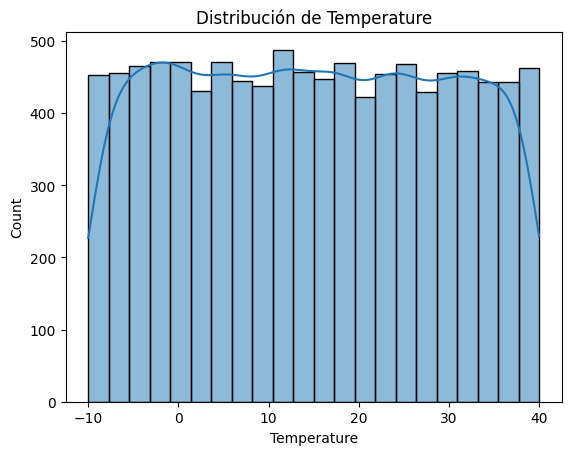

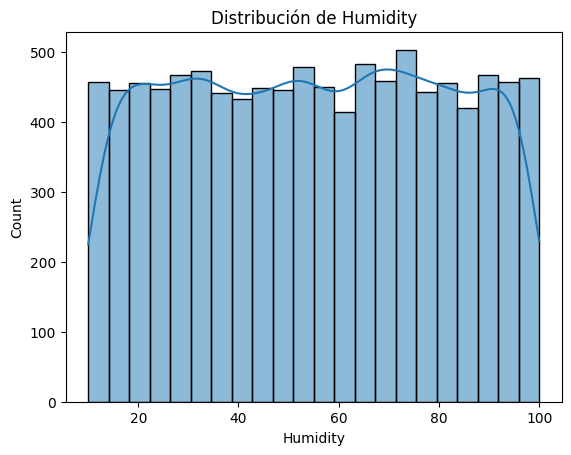

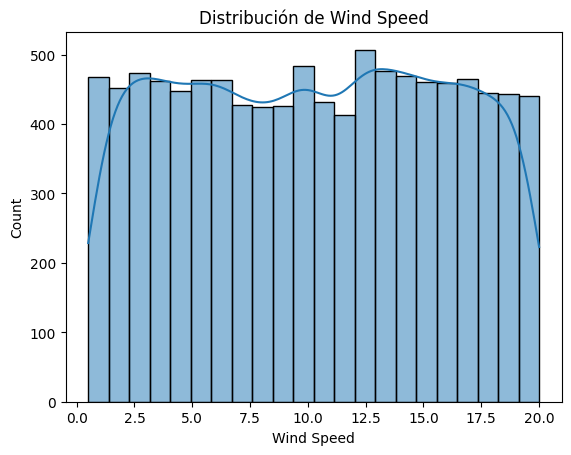


## 3. Matriz de Correlación


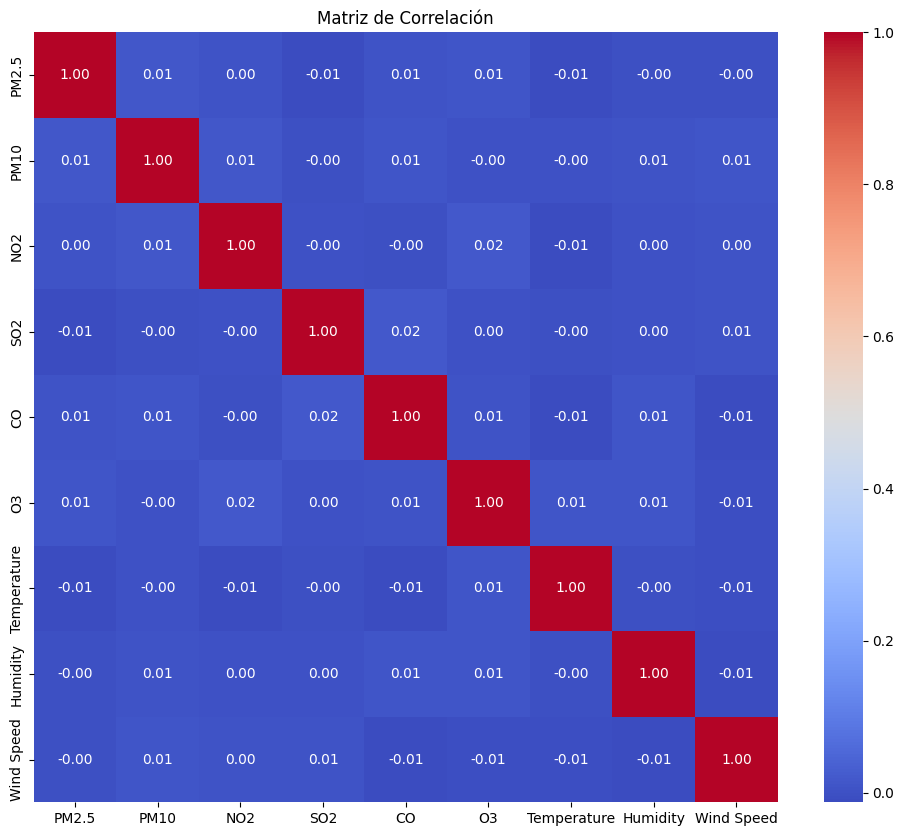


## 4. Pairplot para Relaciones entre Variables


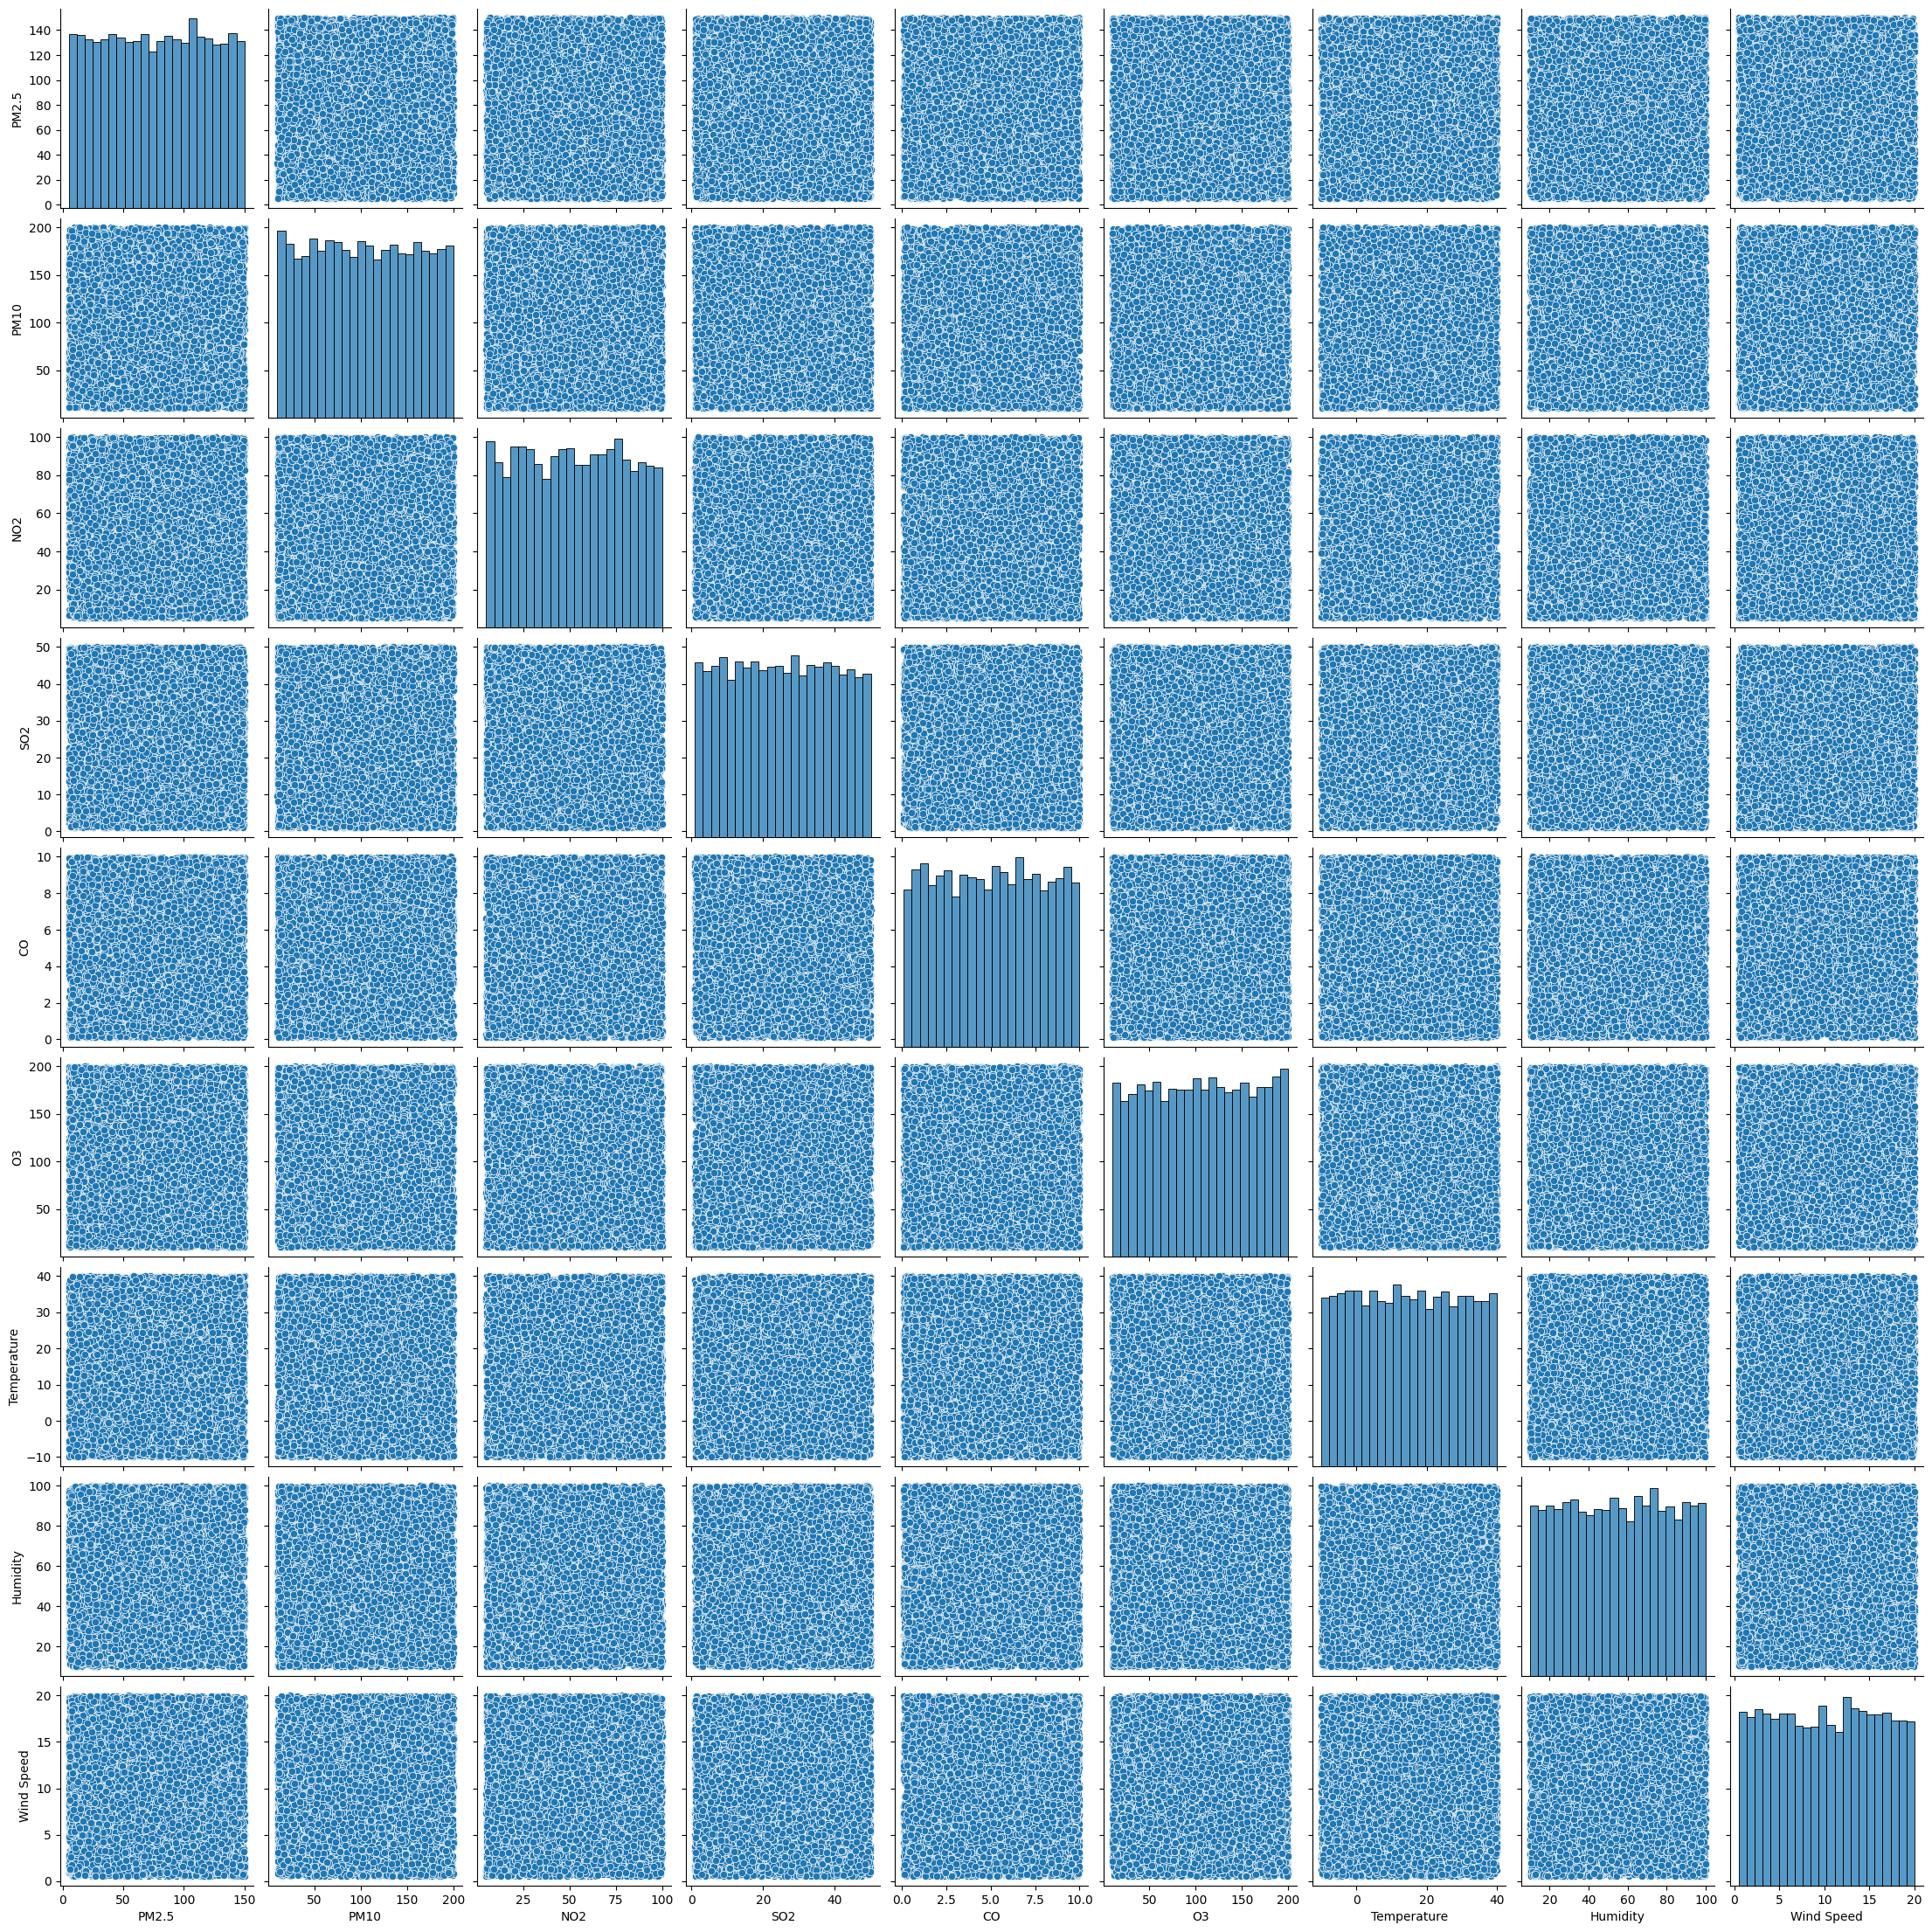


## 5. Diagramas de Caja para Detección de Valores Atípicos


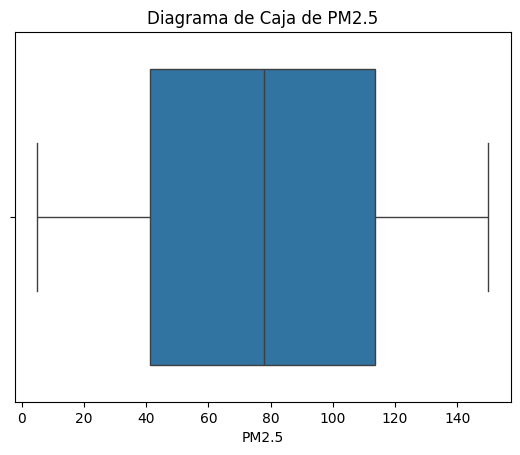

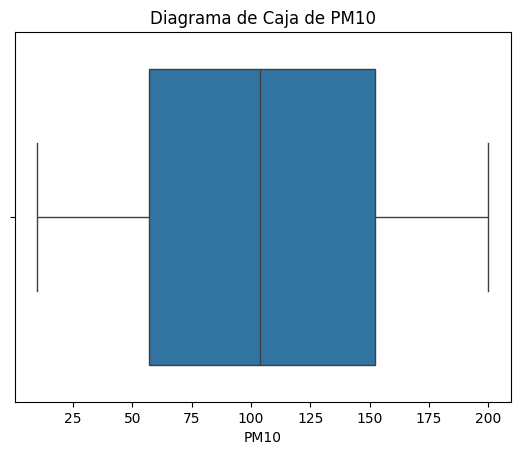

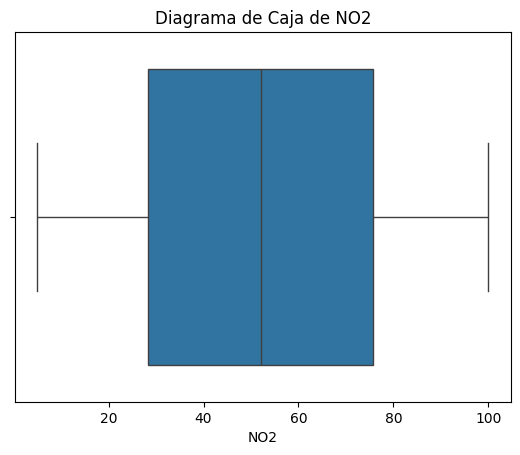

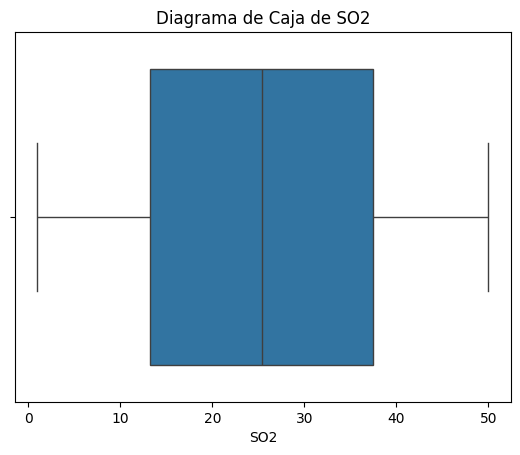

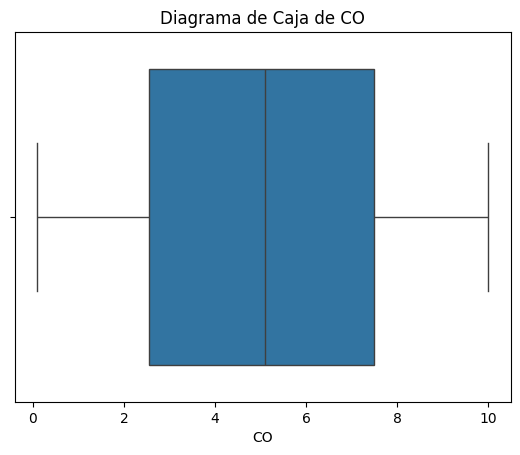

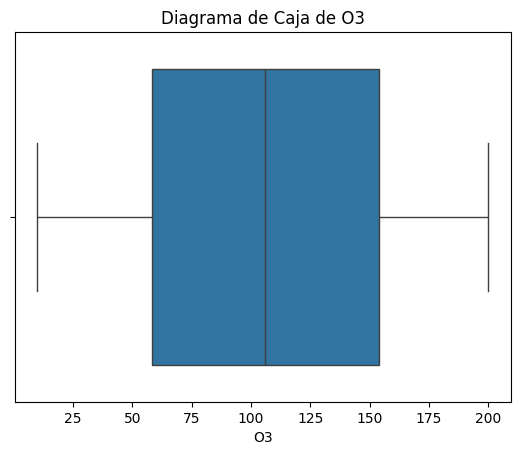

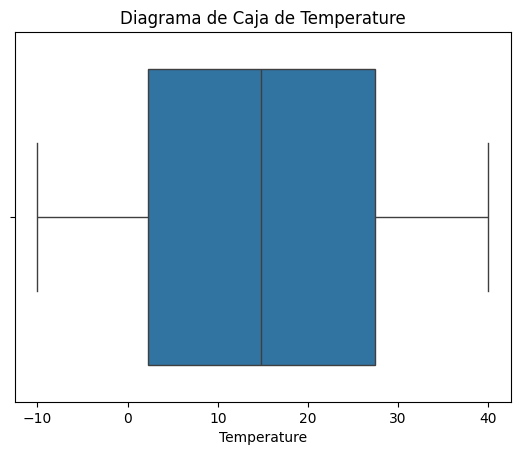

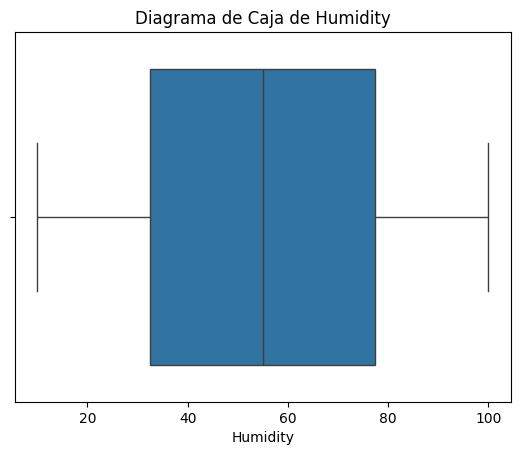

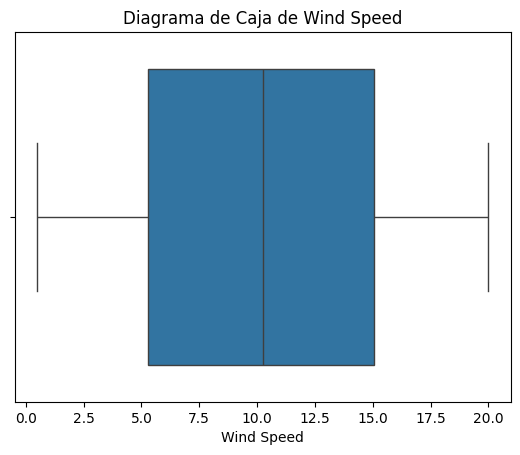


## 6. Analizar Variables Categóricas

### Conteo de Valores para City:
City
mumbai            540
seoul             522
johannesburg      521
dubai             520
berlin            519
toronto           518
madrid            518
cairo             510
bangkok           499
los angeles       497
istanbul          492
rio de janeiro    491
tokyo             491
london            489
paris             489
beijing           488
sydney            486
moscow            482
new york          465
mexico city       463
Name: count, dtype: int64


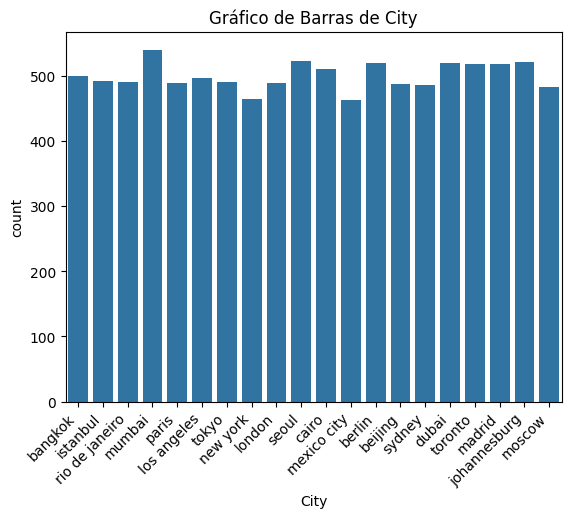


### Conteo de Valores para Country:
Country
usa             962
india           540
south korea     522
south africa    521
uae             520
germany         519
canada          518
spain           518
egypt           510
thailand        499
turkey          492
brazil          491
japan           491
france          489
uk              489
china           488
australia       486
russia          482
mexico          463
Name: count, dtype: int64


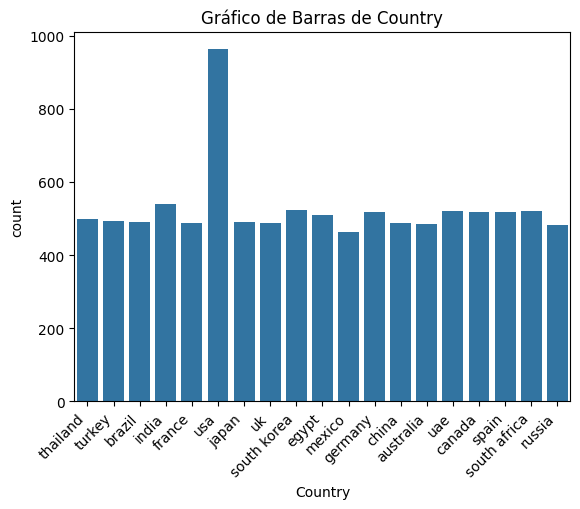


### Conteo de Valores para Date:
Date
2023-02-01    50
2023-04-07    46
2023-04-05    46
2023-09-09    44
2023-09-14    43
              ..
2023-12-23    18
2023-03-07    18
2023-01-27    18
2023-05-28    18
2023-02-09    14
Name: count, Length: 336, dtype: int64


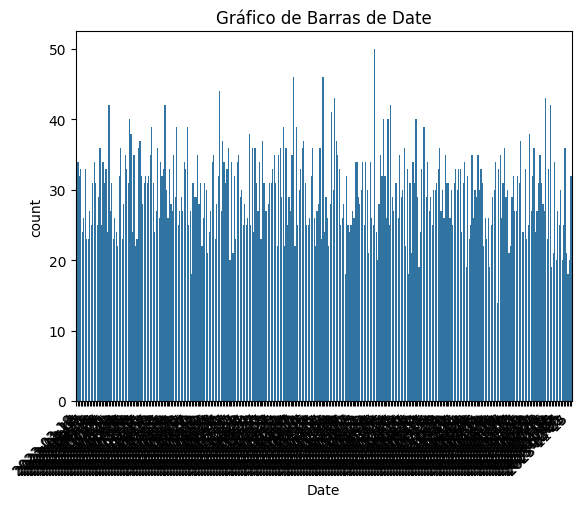


## 7. Explorar relaciones o tendencias específicas (Ejemplo: Gráfico de dispersión)


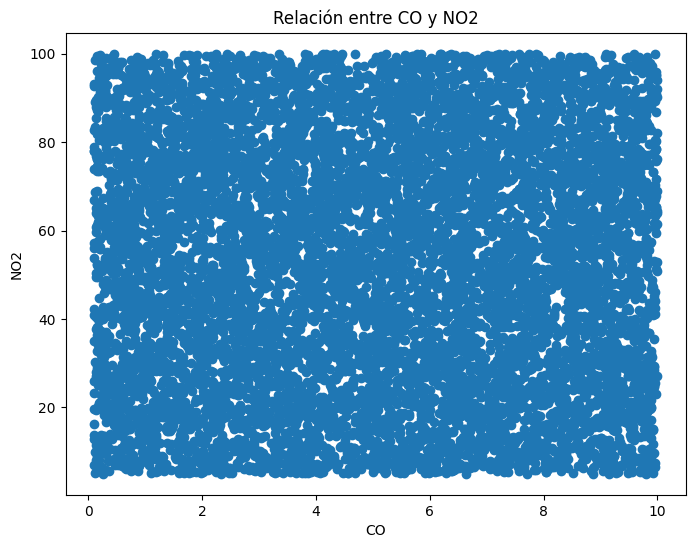

In [8]:
!pip install kagglehub
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descarga la última versión del dataset
ruta = kagglehub.dataset_download("waqi786/global-air-quality-dataset")

print("Ruta a los archivos del dataset:", ruta)

df = pd.read_csv(ruta + "/global_air_quality_data_10000.csv")

# Elimina filas con valores nulos
df = df.dropna()

# Identifica columnas numéricas para la eliminación de valores atípicos
columnas_numericas = df.select_dtypes(include=['number']).columns

# Elimina valores atípicos usando el método IQR
for columna in columnas_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

# Convierte las columnas a los tipos de datos apropiados
for columna in df.columns:
    if df[columna].dtype == 'object':
        df[columna] = df[columna].str.strip()  # Elimina espacios en blanco al principio y al final
        df[columna] = df[columna].str.lower()  # Convierte a minúsculas


# Análisis Exploratorio de Datos con Documentación

# 1. Estadísticas Descriptivas
print("## 1. Estadísticas Descriptivas")
print(df.describe())

# 2. Distribución de Datos para Variables Numéricas
print("\n## 2. Distribución de Datos para Variables Numéricas")
for columna in df.select_dtypes(include=['number']).columns:
    plt.figure()
    sns.histplot(df[columna], kde=True)
    plt.title(f"Distribución de {columna}")
    plt.show()

# 3. Matriz de Correlación
print("\n## 3. Matriz de Correlación")
matriz_correlacion = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# 4. Pairplot para Relaciones entre Variables
print("\n## 4. Pairplot para Relaciones entre Variables")
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

# 5. Diagramas de Caja para Detección de Valores Atípicos
print("\n## 5. Diagramas de Caja para Detección de Valores Atípicos")
for columna in df.select_dtypes(include=['number']).columns:
    plt.figure()
    sns.boxplot(x=df[columna])
    plt.title(f"Diagrama de Caja de {columna}")
    plt.show()

# 6. Analizar Variables Categóricas
print("\n## 6. Analizar Variables Categóricas")
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\n### Conteo de Valores para {columna}:")
    print(df[columna].value_counts())
    plt.figure()
    sns.countplot(x=df[columna])
    plt.title(f"Gráfico de Barras de {columna}")
    plt.xticks(rotation=45, ha="right")  # Rotar etiquetas del eje x para mejor legibilidad
    plt.show()

# 7. Explorar relaciones o tendencias específicas (Ejemplo: Gráfico de dispersión)
print("\n## 7. Explorar relaciones o tendencias específicas (Ejemplo: Gráfico de dispersión)")

# Reemplaza 'CO' y 'NO2' con los nombres reales de las columnas si es necesario
if 'CO' in df.columns and 'NO2' in df.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['CO'], df['NO2'])
    plt.xlabel('CO')
    plt.ylabel('NO2')
    plt.title('Relación entre CO y NO2')
    plt.show()
else:
    print("Las columnas 'CO' y/o 'NO2' no se encontraron en el DataFrame.")
    print("Por favor, reemplázalas con los nombres reales de las columnas de tus datos.")
    print("Columnas disponibles:", df.columns) # Imprime las columnas disponibles para referencia